In [140]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# To validate and demonstrate the high generalization and applicability of the HFBTP dataset, thereby demonstrating its value.
# We conducted data analysis and aggregation on HFBTP and related blockchain performance datasets to demonstrate that these datasets have similar data distributions and trends.
# We will continue to update this Notebook!!!

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data drawing
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 2
# Using string concatenation to generate dynamic variables reduces excessive code redundancy.
Dataset = ["BPD","HFBTP"] # Dataset, BPD (3120 in total), HFBTP (24687 in total)
BPDpath = "/kaggle/input/blockchain-performance/BPD.csv"
HFBTPpath = "/kaggle/input/hfbtp-a-blockchain-performance-dataset/HFBTP.csv"

In [141]:
BPDdata = pd.read_csv('BPD.csv')
HFBTPdata = pd.read_csv('HFBTP.csv')
BPDdata = BPDdata.dropna()
HFBTPdata = HFBTPdata.dropna()

In [142]:
import matplotlib.pyplot as plt

def x_vs_y(dataframes, x_columns, y_columns, labels, names_list):
    """
    Plot latency vs. transaction arrival rate for given dataframes.
    
    Parameters:
    - dataframes: list of DataFrame objects
    - rate_columns: list of column names representing transaction arrival rate
    - latency_columns: list of column names representing latency
    - labels: list of labels to use for the plots
    """
    avglatency = {}
    drawdata = {}

    # Initialize dictionaries
    for label in labels:
        avglatency.setdefault(label, {})
        drawdata.setdefault(label, [])

    # Calculate average latency
    for df, x_col, y_col, label in zip(dataframes, x_columns, y_columns, labels):
        for i, j in zip(df[x_col], df[y_col]):
            if i not in avglatency[label]:
                avglatency[label].setdefault(i, [1, j])
            else:
                avglatency[label][i][0] += 1
                avglatency[label][i][1] += j
        
        for key in avglatency[label]:
            avglatency[label][key][1] /= avglatency[label][key][0]
            drawdata[label].append([key, avglatency[label][key][1]])
        drawdata[label].sort()

    # Plotting the graph
    plt.figure(figsize=(10, 6))
    plt.xlabel(names_list[0])#names_list[0]
    plt.ylabel(names_list[1])#names_list[1]

    for label in labels:
        plt.plot([i[0] for i in drawdata[label]], [i[1] for i in drawdata[label]], label=label)

    plt.legend(loc="upper left")
    plt.title(names_list[2])##names_list[2]
    plt.show()

In [143]:
import matplotlib.pyplot as plt

def blocksize_plots(dataframe, rate_column, para_column, blocksize_column, orderer_column, block_sizes, orderers_value, graph_labels):
    """
    Plot Throughput/latency vs. transaction arrival rate for different block sizes.
    
    Parameters:
    - dataframe: DataFrame object containing the data
    - rate_column: Column name representing transaction arrival rate
    - para_column: Column name representing parameter (latency or throughput)
    - blocksize_column: Column name representing block sizes
    - orderer_column: Column name representing orderers
    - block_sizes: List of block sizes to be plotted
    - orderers_value: The value of the orderers to filter the data
    - graph_labels: Names of x and y axis along with graph title
    """
    plt.figure(figsize=(10, 6))
    plt.xlabel(graph_labels[0])
    plt.ylabel(graph_labels[1])

    # Plot data for each block size
    for block_size in block_sizes:
        filtered_data = dataframe[(dataframe[blocksize_column] == block_size) & (dataframe[orderer_column] == orderers_value)]
        plt.plot(filtered_data[rate_column], filtered_data[para_column], label=f"Block size: {block_size}")

    plt.legend(loc="upper left")
    plt.title(graph_labels[2])
    plt.show()

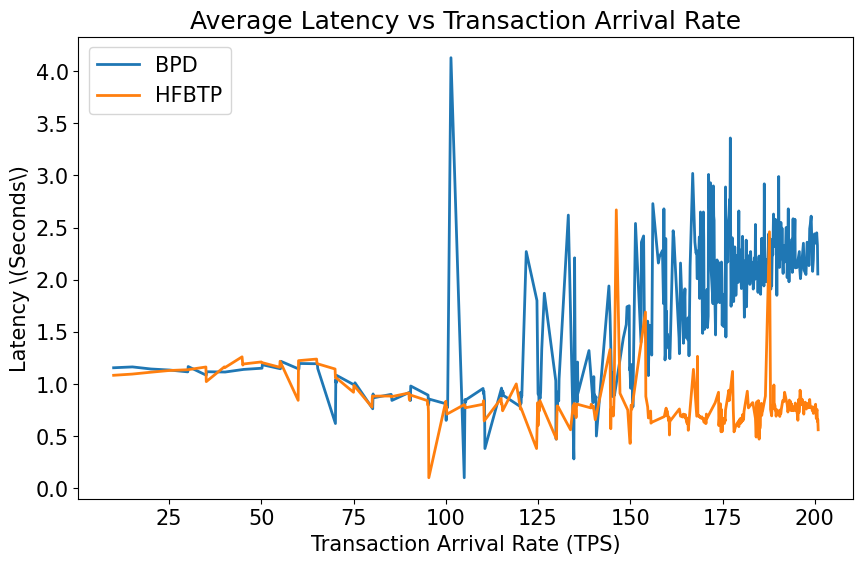

In [144]:
# Usage:
x_vs_y(
    dataframes=[BPDdata, HFBTPdata],
    x_columns=["Send Rates", "Actual Transaction Arrival Rate"],
    y_columns=["Avg Latency", "Avg Latency"],
    labels=["BPD", "HFBTP"],
    names_list=["Transaction Arrival Rate (TPS)", "Latency \(Seconds\)", "Average Latency vs Transaction Arrival Rate"]
)
# Conclusion 1: latency will be affected by the performance of computing devices, but the overall trend is similar.

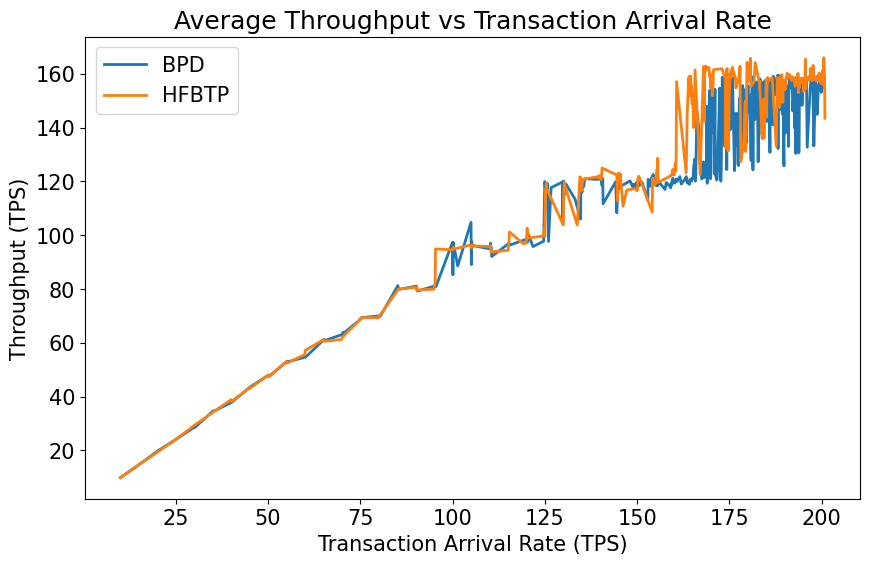

In [145]:
# Usage:
x_vs_y(
    dataframes=[BPDdata, HFBTPdata],
    x_columns=["Send Rates", "Actual Transaction Arrival Rate"],
    y_columns=["Throughput", "Throughput"],
    labels=["BPD", "HFBTP"],
    names_list = ["Transaction Arrival Rate (TPS)", "Throughput (TPS)", "Average Throughput vs Transaction Arrival Rate"]
)
# Conclusion 2: The overall trend of throughput is very close, even if devices with different computing capabilities are used. modify above code to accept dataframe and column names to display graph plots

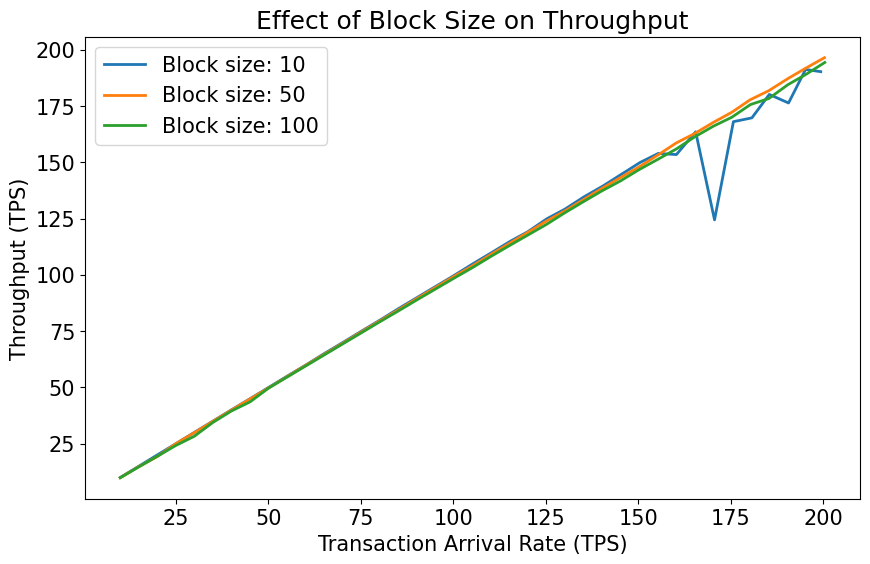

In [146]:
# Usage:
blocksize_plots(
    dataframe=HFBTPdata,
    rate_column="Actual Transaction Arrival Rate",
    para_column="Throughput",
    blocksize_column="Block Size",
    orderer_column="Orderers",
    block_sizes=[10, 50, 100],
    orderers_value=3,
    graph_labels = ["Transaction Arrival Rate (TPS)", "Throughput (TPS)", "Effect of Block Size on Throughput"]
)
# Conclusion 3: Setting different block sizes will affect the throughput.  modify above code to accept dataframe and column names to display graph plots

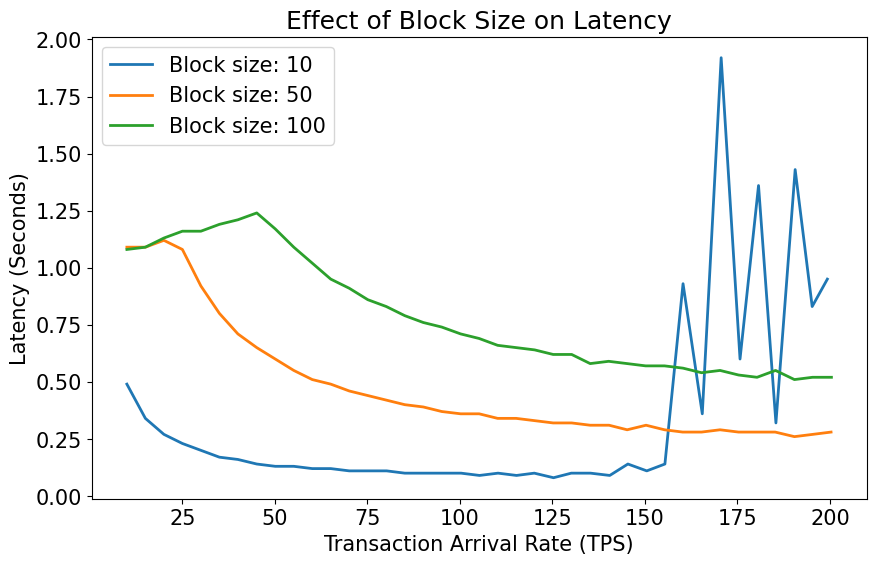

In [147]:
# Usage:
blocksize_plots(
    dataframe=HFBTPdata,
    rate_column="Actual Transaction Arrival Rate",
    para_column="Avg Latency",
    blocksize_column="Block Size",
    orderer_column="Orderers",
    block_sizes=[10, 50, 100],
    orderers_value=3,
    graph_labels = ["Transaction Arrival Rate (TPS)", "Latency (Seconds)", "Effect of Block Size on Latency"]
)
# Conclusion 4: Setting different block sizes will affect the latency. modify above code to accept dataframe and column names to display graph plots

In [148]:
# Analyzed 27,807 entries from BPD.csv and HFBTP.csv